# Assignment 0

##  Problem 1: Converting Hourly to Daily and Calculating Returns

#### 1. Download Hourly Data:

First we import all the required libraries.

In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

For the first problem, we choose the stock MSFT (Microsoft) and index S&P 500.

In [2]:
msft = yf.Ticker("msft")
msft

yfinance.Ticker object <MSFT>

We download Microsoft's stock data from Jan 2023 to Jan 2024.

In [3]:
msft_hist = msft.history(start = "2023-01-01", end = "2024-01-31", interval = "1h")

msft_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,243.080002,245.750000,239.340103,239.788101,6337273,0.0,0.0
2023-01-03 10:30:00-05:00,239.800003,239.830002,237.500000,238.360001,3058832,0.0,0.0
2023-01-03 11:30:00-05:00,238.369995,238.690002,237.500000,238.150101,2236397,0.0,0.0
2023-01-03 12:30:00-05:00,238.179993,238.990005,237.399994,238.440002,2596124,0.0,0.0
2023-01-03 13:30:00-05:00,238.449997,238.949997,238.050003,238.550003,1635805,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-30 11:30:00-05:00,410.160004,410.307495,407.230011,407.470001,2539592,0.0,0.0
2024-01-30 12:30:00-05:00,407.470001,408.220795,406.450104,408.019989,2754374,0.0,0.0
2024-01-30 13:30:00-05:00,408.070007,408.329987,407.309998,408.012695,2268630,0.0,0.0


Next we drop the 'Dividends' and 'Stock Splits' columns since they are of no use to us right now and might mess up our calculations.

In [4]:
msft_hist = msft_hist.drop(["Dividends", "Stock Splits"], axis = 1)

In [5]:
msft_hist.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-01-03 09:30:00-05:00,243.080002,245.750000,239.340103,239.788101,6337273
2023-01-03 10:30:00-05:00,239.800003,239.830002,237.500000,238.360001,3058832
2023-01-03 11:30:00-05:00,238.369995,238.690002,237.500000,238.150101,2236397
2023-01-03 12:30:00-05:00,238.179993,238.990005,237.399994,238.440002,2596124
2023-01-03 13:30:00-05:00,238.449997,238.949997,238.050003,238.550003,1635805


We download the S&P 500 data below as shown.

In [33]:
sp500_hist = yf.download("^GSPC", interval="1h", start="2023-01-1", end="2024-01-31")

sp500_hist

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-03 09:30:00-05:00,3853.290039,3878.459961,3817.229980,3823.179932,3823.179932,0
2023-01-03 10:30:00-05:00,3823.649902,3837.610107,3810.219971,3815.540039,3815.540039,282312663
2023-01-03 11:30:00-05:00,3815.469971,3815.469971,3800.209961,3804.169922,3804.169922,224684476
2023-01-03 12:30:00-05:00,3804.239990,3813.949951,3794.330078,3810.050049,3810.050049,189491134
2023-01-03 13:30:00-05:00,3810.100098,3815.969971,3803.340088,3804.979980,3804.979980,190072000
...,...,...,...,...,...,...
2024-01-30 11:30:00-05:00,4925.740234,4930.049805,4920.549805,4920.910156,4920.910156,256057121
2024-01-30 12:30:00-05:00,4920.950195,4924.450195,4916.270020,4924.080078,4924.080078,223249000
2024-01-30 13:30:00-05:00,4924.100098,4927.990234,4919.939941,4927.319824,4927.319824,229234000


 #### 2. Convert Hourly Data to Daily Data:

We now define a function to convert all the parameters (Open, Close, High, etc.) of our hourly data into daily data. We use the df.resample method for this, also specifying the particular action required for each respective column, like 'first' for Open, 'sum' for Volume, and so on, as shown in the code below. We have used a dictionary for doing this.

In [34]:
def hour_to_day (df):
    if 'Adj Close' in df.columns: #For handling the case of S&P 500's data, where there is an Adj Close column as well.
        ohlcv = {'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last', 'Volume':'sum'}
    else: #MSFT's data has no Adj Close column
        ohlcv = {'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'}
    new_df = df.resample('D', origin='start').agg(ohlcv)
    new_df = new_df.dropna() #We drop all the rows with null values
    return new_df

We apply the function on MSFT's data. We obtain the required daily data.

In [8]:
msft_daily = hour_to_day(msft_hist)
msft_daily.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-01-03 09:30:00-05:00,243.080002,245.750000,237.399994,239.539993,21075894
2023-01-04 09:30:00-05:00,232.274994,232.869995,225.960007,229.079697,45051789
2023-01-05 09:30:00-05:00,227.199997,227.550003,221.760193,222.270004,34623960
2023-01-06 09:30:00-05:00,221.500000,225.760101,219.350006,224.869995,37190291
2023-01-09 09:30:00-05:00,226.449997,231.236603,226.410004,227.149994,22817625


Again, we apply the function on S&P 500's data, and succesfully get the daily data.

In [9]:
sp500_daily = hour_to_day(sp500_hist)
sp500_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-03 09:30:00-05:00,3853.290039,3878.459961,3794.330078,3824.070068,3824.070068,1472014273
2023-01-04 09:30:00-05:00,3840.360107,3873.159912,3815.770020,3852.929932,3852.929932,1656812857
2023-01-05 09:30:00-05:00,3839.739990,3839.739990,3802.419922,3808.229980,3808.229980,1454685731
2023-01-06 09:30:00-05:00,3823.370117,3906.189941,3809.560059,3894.199951,3894.199951,1607257434
2023-01-09 09:30:00-05:00,3910.820068,3950.570068,3890.419922,3892.149902,3892.149902,1589854466


#### 3. Calculate Daily and Cumulative Returns:

Now we write 2 functions which take a dataframe as input and calculate the daily return and cumulative return respectively, and add it as a column to the dataframe.

In [10]:
def daily_return(df):
    df['Daily_Return'] = 100 * (df['Close'] - df['Open'])/df['Open'] #We express the daily return as a percentage
    return df
def cumulative_return(df):
    df['Cumulative_Return'] = 100 * (df['Close'] - df.iloc[0,0])/df.iloc[0,0] #We express the cumulative return as a percentage
    return df

We implement the 2 functions on both MSFT & S&P 500.

In [11]:
msft_daily = daily_return(msft_daily)
msft_daily = cumulative_return(msft_daily)
sp500_daily = daily_return(sp500_daily)
sp500_daily = cumulative_return(sp500_daily)

We can see that we get 2 extra columns for MSFT - Daily_Return and Cumulative_Return. Note that we have expressed both as percentages.

In [12]:
msft_daily

,Open,High,Low,Close,Volume,Daily_Return,Cumulative_Return
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,243.080002,245.750000,237.399994,239.539993,21075894,-1.456314,-1.456314
2023-01-04 09:30:00-05:00,232.274994,232.869995,225.960007,229.079697,45051789,-1.375653,-5.759546
2023-01-05 09:30:00-05:00,227.199997,227.550003,221.760193,222.270004,34623960,-2.169891,-8.560967
2023-01-06 09:30:00-05:00,221.500000,225.760101,219.350006,224.869995,37190291,1.521442,-7.491364
2023-01-09 09:30:00-05:00,226.449997,231.236603,226.410004,227.149994,22817625,0.309118,-6.553401
...,...,...,...,...,...,...,...
2024-01-24 09:30:00-05:00,401.540009,405.630005,400.450012,402.570007,18998352,0.256512,65.612146
2024-01-25 09:30:00-05:00,403.750000,407.010010,402.529388,405.089996,16975153,0.331888,66.648837
2024-01-26 09:30:00-05:00,404.369995,406.170013,402.429993,403.910004,13332395,-0.113755,66.163403


Similarly, we see S&P 500 also has 2 new columns - Daily_Return and Cumulative_Return.

In [13]:
sp500_daily

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Cumulative_Return
Datetime,,,,,,,,
2023-01-03 09:30:00-05:00,3853.290039,3878.459961,3794.330078,3824.070068,3824.070068,1472014273,-0.758312,-0.758312
2023-01-04 09:30:00-05:00,3840.360107,3873.159912,3815.770020,3852.929932,3852.929932,1656812857,0.327308,-0.009345
2023-01-05 09:30:00-05:00,3839.739990,3839.739990,3802.419922,3808.229980,3808.229980,1454685731,-0.820629,-1.169392
2023-01-06 09:30:00-05:00,3823.370117,3906.189941,3809.560059,3894.199951,3894.199951,1607257434,1.852550,1.061688
2023-01-09 09:30:00-05:00,3910.820068,3950.570068,3890.419922,3892.149902,3892.149902,1589854466,-0.477398,1.008485
...,...,...,...,...,...,...,...,...
2024-01-24 09:30:00-05:00,4888.560059,4903.680176,4865.939941,4869.029785,4869.029785,1741230052,-0.399510,26.360324
2024-01-25 09:30:00-05:00,4886.660156,4898.149902,4869.339844,4895.049805,4895.049805,1895703124,0.171685,27.035592
2024-01-26 09:30:00-05:00,4888.910156,4906.689941,4881.470215,4890.069824,4890.069824,2027652000,0.023720,26.906352


Now we plot the daily returns of MSFT and S&P 500, and compare them.

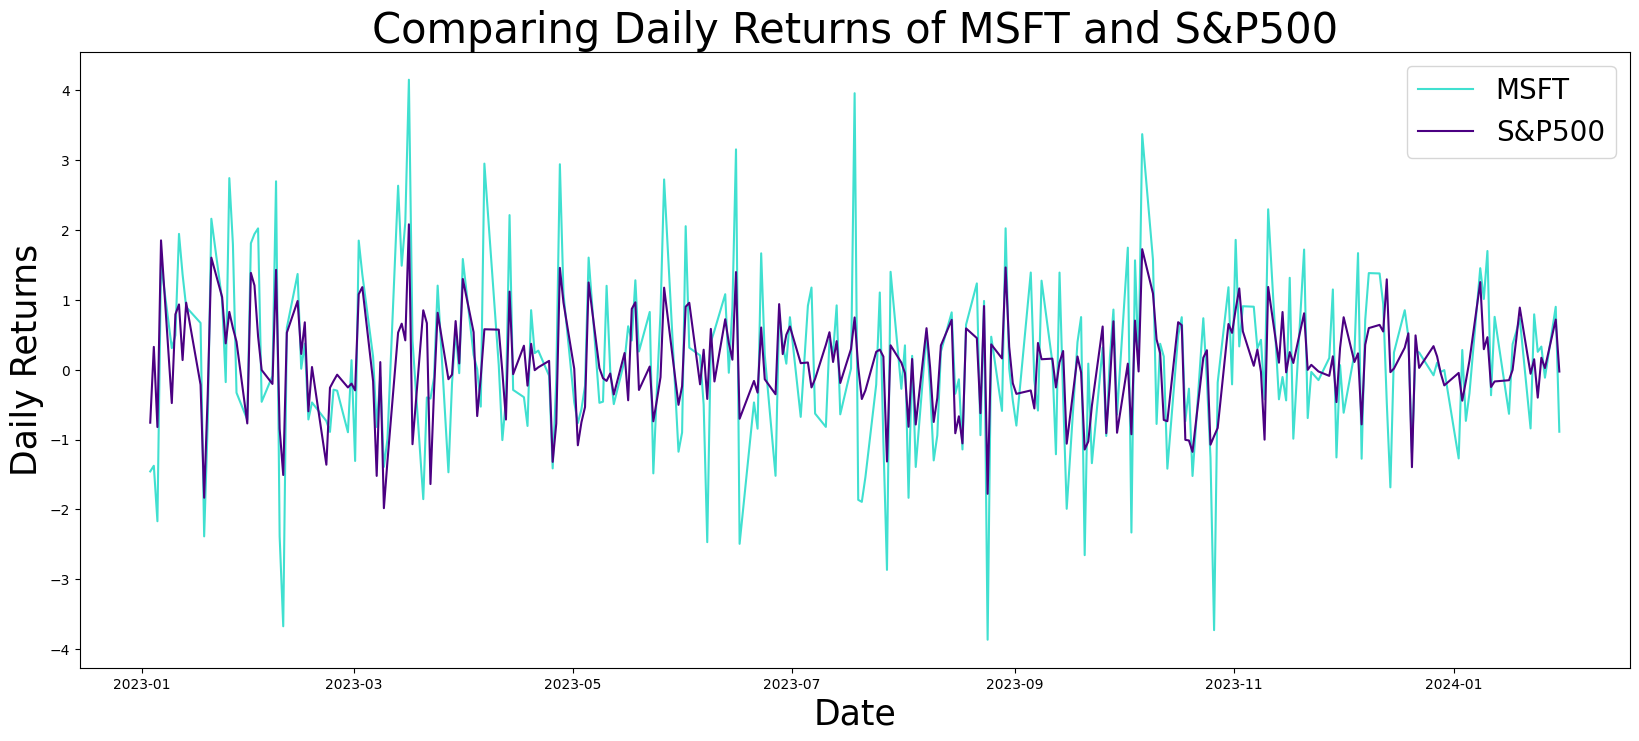

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Daily Returns", fontsize = 25)
plt.title("Comparing Daily Returns of MSFT and S&P500", fontsize = 30)
 
# plotting the "A" column alone
plt.plot(msft_daily["Daily_Return"], color = 'turquoise', label = "MSFT")
plt.plot(sp500_daily["Daily_Return"], color = 'indigo', label = "S&P500")
plt.legend(fontsize = 20)
plt.show()

We can clearly see that for most of the cases, MSFT's daily return trend matches with that of S&P 500 (i.e, both go up or go down simultaneously), but MSFT fluctuates more (it goes up or down by a large margin) whereas the index (S&P 500) is relatively stable (goes up or down very little). 

This is expected since an index considers many stocks (like S&P 500 takes into account 500 stocks in the US market), hence naturally due to averaging effect it will be more stable than a single stock belonging to it.

Next we will compare the cumulative return of MSFT and S&P 500.

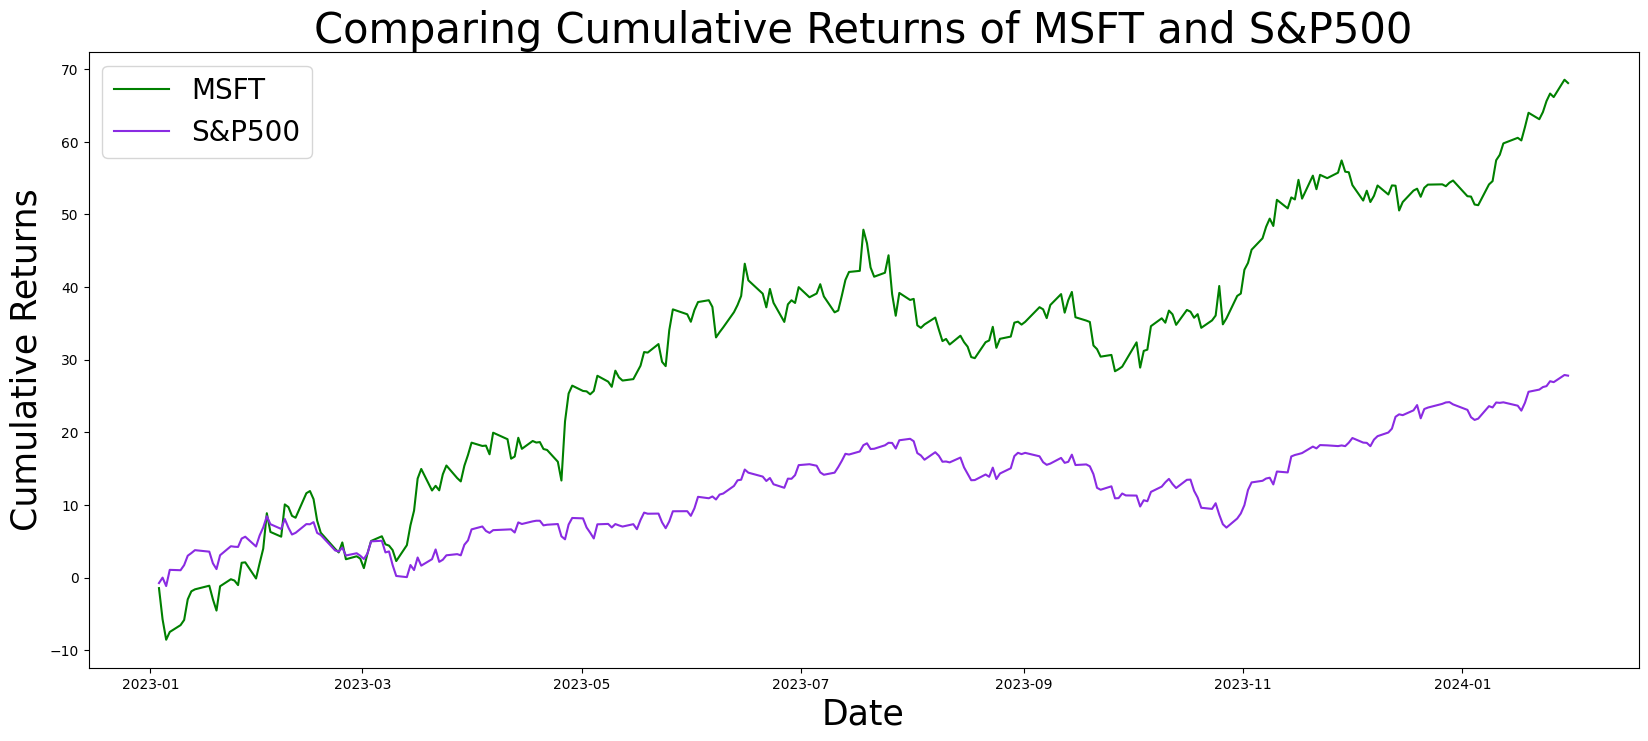

In [15]:
plt.figure(figsize=(20, 8))
plt.xlabel("Date",fontsize = 25)
plt.ylabel("Cumulative Returns",fontsize = 25)
plt.title("Comparing Cumulative Returns of MSFT and S&P500", fontsize = 30)
 
# plotting the "A" column alone
plt.plot(msft_daily["Cumulative_Return"], color = 'green', label = "MSFT")
plt.plot(sp500_daily["Cumulative_Return"], color = 'blueviolet', label = "S&P500")
plt.legend(fontsize = 20)
plt.show()

It is evident that Microsoft's cumulative return is quite higher than the index's cumulative return. This implies that Microsoft has relatively done well over the course of this one year - it has grown more than the market, hence it has 'beaten the market'. It would have definitely been a good stock to invest in!

## Problem 2: Datetime Operations and Rolling Means

#### 1. Download Daily Data or Convert Hourly Data to Daily:

For the next problem, we choose Dell's stock.

In [16]:
dell = yf.Ticker('dell')
dell

yfinance.Ticker object <DELL>

We download the daily stock data for Dell from Jan 2023 to Jan 2024.

In [17]:
dell_daily = dell.history(start = "2023-01-01", end = "2024-01-31", interval = "1d")
dell_daily

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,39.063498,39.467999,38.495266,39.390953,2679200,0.0,0.0
2023-01-04 00:00:00-05:00,39.862875,40.065126,39.082763,39.429478,2790000,0.0,0.0
2023-01-05 00:00:00-05:00,39.246485,39.583570,38.793825,39.362057,2483700,0.0,0.0
2023-01-06 00:00:00-05:00,39.650990,41.018599,39.313905,40.854870,3179700,0.0,0.0
2023-01-09 00:00:00-05:00,41.124541,41.509781,40.633356,40.720036,2966400,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-24 00:00:00-05:00,83.176526,84.591023,82.678463,83.385712,3637800,0.0,0.0
2024-01-25 00:00:00-05:00,84.172651,84.710560,82.688425,82.718307,2723300,0.0,0.0
2024-01-26 00:00:00-05:00,82.190363,84.053114,81.801875,83.893738,2927500,0.0,0.0


#### 2. Calculate a New Datetime Attribute:

We use the .dayofweek attribute from the datetime library in order to get the day of the week from the date column. We also add the day of the week as a new column to our dataframe, as shown below.

In [18]:
import datetime as dt
dell_daily = dell_daily.reset_index()  #We reset the index to get Date as a column
dell_daily['Weekday'] = dell_daily['Date'].dt.dayofweek
dell_daily.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Weekday
0,2023-01-03 00:00:00-05:00,39.063498,39.467999,38.495266,39.390953,2679200,0.0,0.0,1
1,2023-01-04 00:00:00-05:00,39.862875,40.065126,39.082763,39.429478,2790000,0.0,0.0,2
2,2023-01-05 00:00:00-05:00,39.246485,39.583570,38.793825,39.362057,2483700,0.0,0.0,3
3,2023-01-06 00:00:00-05:00,39.650990,41.018599,39.313905,40.854870,3179700,0.0,0.0,4
4,2023-01-09 00:00:00-05:00,41.124541,41.509781,40.633356,40.720036,2966400,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
265,2024-01-24 00:00:00-05:00,83.176526,84.591023,82.678463,83.385712,3637800,0.0,0.0,2
266,2024-01-25 00:00:00-05:00,84.172651,84.710560,82.688425,82.718307,2723300,0.0,0.0,3
267,2024-01-26 00:00:00-05:00,82.190363,84.053114,81.801875,83.893738,2927500,0.0,0.0,4
268,2024-01-29 00:00:00-05:00,84.053112,84.341989,83.027103,83.086876,2710300,0.0,0.0,0


Here 0 represents Monday, 1 represents Tuesday, and so on. To make it clearer, we convert the number to the actual weekday in English.

In [19]:
for i in range(270):
    if dell_daily.iloc[i,8] == 0:
        dell_daily.iloc[i,8] = "Monday"
    if dell_daily.iloc[i,8] == 1:
        dell_daily.iloc[i,8] = "Tuesday"
    if dell_daily.iloc[i,8] == 2:
        dell_daily.iloc[i,8] = "Wednesday"
    if dell_daily.iloc[i,8] == 3:
        dell_daily.iloc[i,8] = "Thursday"
    if dell_daily.iloc[i,8] == 4:
        dell_daily.iloc[i,8] = "Friday"
    if dell_daily.iloc[i,8] == 5:
        dell_daily.iloc[i,8] = "Saturday"
    if dell_daily.iloc[i,8] == 6:
        dell_daily.iloc[i,8] = "Sunday"

C:\Users\rayar\AppData\Local\Temp\ipykernel_4380\3057394118.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Tuesday' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  dell_daily.iloc[i,8] = "Tuesday"


Now we get a proper dataframe with the 'Weekday' column.

In [20]:
dell_daily.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Weekday
0,2023-01-03 00:00:00-05:00,39.063498,39.467999,38.495266,39.390953,2679200,0.0,0.0,Tuesday
1,2023-01-04 00:00:00-05:00,39.862875,40.065126,39.082763,39.429478,2790000,0.0,0.0,Wednesday
2,2023-01-05 00:00:00-05:00,39.246485,39.583570,38.793825,39.362057,2483700,0.0,0.0,Thursday
3,2023-01-06 00:00:00-05:00,39.650990,41.018599,39.313905,40.854870,3179700,0.0,0.0,Friday
4,2023-01-09 00:00:00-05:00,41.124541,41.509781,40.633356,40.720036,2966400,0.0,0.0,Monday
...,...,...,...,...,...,...,...,...,...
265,2024-01-24 00:00:00-05:00,83.176526,84.591023,82.678463,83.385712,3637800,0.0,0.0,Wednesday
266,2024-01-25 00:00:00-05:00,84.172651,84.710560,82.688425,82.718307,2723300,0.0,0.0,Thursday
267,2024-01-26 00:00:00-05:00,82.190363,84.053114,81.801875,83.893738,2927500,0.0,0.0,Friday
268,2024-01-29 00:00:00-05:00,84.053112,84.341989,83.027103,83.086876,2710300,0.0,0.0,Monday


Next we calculate the average closing price for each day of the week, through the code below. For that, we initialize 'total' and 'count' numpy arrays in order to calculate the total closing price and the no. of instances respectively for each particular weekday, as we loop through the entire dataframe.

In [21]:
Avg_cp = np.array([0,0,0,0,0,0,0])
count = np.array([0,0,0,0,0,0,0])
total = np.array([0,0,0,0,0,0,0])
dict = {"Monday" : 0, "Tuesday" : 1, "Wednesday" : 2, "Thursday" : 3, "Friday" : 4, "Saturday" : 5, "Sunday" : 6}
for i in range(270):
    for day in dict.keys():
        if dell_daily.iloc[i,8] == day:
            count[dict[day]] += 1
            total[dict[day]] += dell_daily.iloc[i,4]
            continue  

We divide 'total' by 'count' to get the average closing price for each weekday.

In [22]:
avg_cp = total/count
avg_cp

C:\Users\rayar\AppData\Local\Temp\ipykernel_4380\1491142974.py:1: RuntimeWarning: invalid value encountered in divide
  avg_cp = total/count


array([54.52083333, 55.        , 54.42857143, 54.27272727, 55.23636364,
               nan,         nan])

The stock market is closed on Saturday and Sunday, hence we are getting the last two nan values. We drop them.

In [23]:
avg_cp = avg_cp[:5]
avg_cp

array([54.52083333, 55.        , 54.42857143, 54.27272727, 55.23636364])

We show our average closing prices through a dataframe.

In [24]:
data = {'Average Closing Price' : avg_cp}
avg_df = pd.DataFrame(data, index = ["Monday", "Tuesday", "Wedneday", "Thursday", "Friday"])
avg_df

,Average Closing Price
Monday,54.520833
Tuesday,55.000000
Wedneday,54.428571
Thursday,54.272727
Friday,55.236364


We can clearly see that Friday has the highest average closing price, at 55.236.

Next we plot the average closing price vs the day of the week.

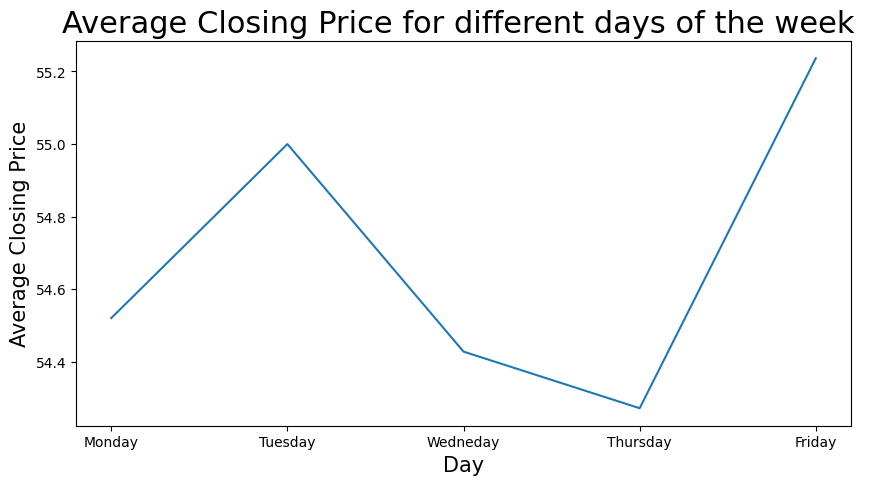

In [25]:
plt.figure(figsize=(10, 5))
plt.xlabel("Day", fontsize = 15)
plt.ylabel("Average Closing Price", fontsize = 15)
plt.title("Average Closing Price for different days of the week ", fontsize = 22)
 
# plotting the "A" column alone
plt.plot(avg_df["Average Closing Price"])
plt.show()

Again it is quite evident from the graph that Friday's average closing price is the highest.

 #### 3. Calculate the 7-Day Rolling Mean:

We write a function to calculate the 7-day rolling mean below. For that, we take as input a dataframe and one of its columns. We apply the .rolling.mean() attribute on the respective column. Next we add the 7 day rolling mean as a column to our dataframe.

In [26]:
def rolling_mean(df, column):
    df["7-Day Rolling Mean"] = df[column].rolling(7).mean()
    return df

We apply this function on the 'Close' column of our dataframe.

In [27]:
dell_rm = rolling_mean(dell_daily,"Close")
dell_rm

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Weekday,7-Day Rolling Mean
0,2023-01-03 00:00:00-05:00,39.063498,39.467999,38.495266,39.390953,2679200,0.0,0.0,Tuesday,NaN
1,2023-01-04 00:00:00-05:00,39.862875,40.065126,39.082763,39.429478,2790000,0.0,0.0,Wednesday,NaN
2,2023-01-05 00:00:00-05:00,39.246485,39.583570,38.793825,39.362057,2483700,0.0,0.0,Thursday,NaN
3,2023-01-06 00:00:00-05:00,39.650990,41.018599,39.313905,40.854870,3179700,0.0,0.0,Friday,NaN
4,2023-01-09 00:00:00-05:00,41.124541,41.509781,40.633356,40.720036,2966400,0.0,0.0,Monday,NaN
...,...,...,...,...,...,...,...,...,...,...
265,2024-01-24 00:00:00-05:00,83.176526,84.591023,82.678463,83.385712,3637800,0.0,0.0,Wednesday,80.350685
266,2024-01-25 00:00:00-05:00,84.172651,84.710560,82.688425,82.718307,2723300,0.0,0.0,Thursday,80.901924
267,2024-01-26 00:00:00-05:00,82.190363,84.053114,81.801875,83.893738,2927500,0.0,0.0,Friday,81.884588
268,2024-01-29 00:00:00-05:00,84.053112,84.341989,83.027103,83.086876,2710300,0.0,0.0,Monday,82.645733


We get a new column that gives us the 7-Day Rolling Mean of the closing prices. We note that the first few values are NaN,  since we cannot get a 7-day history for those values. The 7-Day Rolling Mean is a better approximation of a closing price of any day, since it accounts for a week's history of closing prices, thus it gives us a better idea of how well the stock is performing.